## Assignment 4: Summarization

- ### Name: Kunal Kurve and Manasi Malge
- ### PRN: 240340128012 and 240340128013
- ### Date: 08/06/2024

### Q. Open the wikipedia page https://en.wikipedia.org/wiki/Saturn and perform the following

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, RegexpParser
from nltk.corpus import stopwords, wordnet
from nltk import FreqDist
import spacy

from nltk.stem import PorterStemmer, WordNetLemmatizer

from urllib.request import urlopen
from bs4 import BeautifulSoup
import string

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

1. Scrap the web and find top 10 nouns from the page.

In [2]:
url = urlopen('https://en.wikipedia.org/wiki/Saturn')
data = url.read()
soup = BeautifulSoup(data,'html.parser')
text = soup.get_text()
print(text)





Saturn - Wikipedia



































Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload file



















Search











Search





























Create account

Log in








Personal tools





 Create account Log in





		Pages for logged out editors learn more



ContributionsTalk




























Contents
move to sidebar
hide




(Top)





1
Name and symbol








2
Physical characteristics




Toggle Physical characteristics subsection





2.1
Internal structure








2.2
Atmosphere






2.2.1
Cloud layers








2.2.2
Hexagonal cloud patterns










2.3
Magnetosphere










3
Orbit and rotation








4
Natural satellites








5
Planetary rings








6
History of observation and exploration




Toggle History of observa

In [3]:
swords = stopwords.words('english')
wnl = WordNetLemmatizer()

swords = stopwords.words('english')
Tokens = nltk.word_tokenize(text)
token1 = [token for token in Tokens if token.lower() not in swords]
words = [token.lower() for token in token1 if token.isalpha()]
# words

In [4]:
noun_token = [wnl.lemmatize(token, pos='n') for token in words]
nouns = [token.lower() for token in noun_token if token.isalpha()]

freq = FreqDist(nouns)
print("The top 10 nouns are:")
print(freq.most_common(10))

The top 10 nouns are:
[('saturn', 296), ('retrieved', 131), ('original', 123), ('archived', 123), ('planet', 80), ('july', 78), ('ring', 77), ('moon', 68), ('system', 59), ('nasa', 52)]


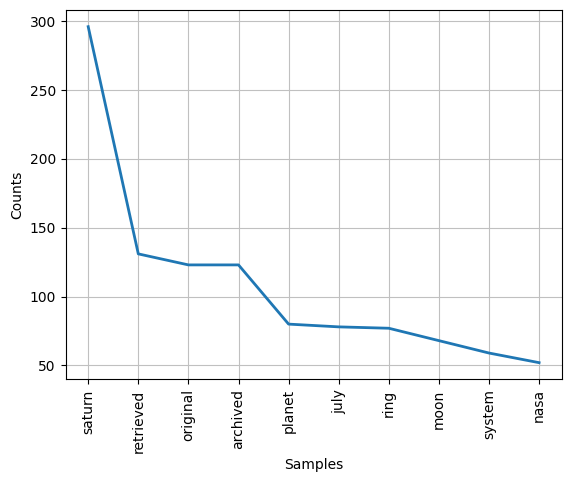

In [5]:
freq.plot(10);

2. Print all the unique verbs in their root form.



In [6]:
tokens = word_tokenize(text)
tags = pos_tag(tokens)

verbs = set()

for word in words:
    lemma = wnl.lemmatize(word, pos='v')
    if word != lemma:
        verbs.add(lemma)

for verb in verbs:
    print(verb)

transition
content
model
lose
magnify
figure
produce
gap
coat
hill
indicate
slow
prove
star
compose
associate
relate
meet
station
lack
improve
top
feature
judge
move
send
jam
edit
flatten
mean
approach
moon
accumulate
shorten
base
shadow
mourn
date
expel
notice
round
replicate
detail
enable
whirlpool
satellite
enter
conduct
become
celebrate
simulate
increase
ascend
correlate
refute
drape
compare
tool
persist
process
acquire
storm
receive
number
log
image
report
stand
modulate
scatter
interest
land
release
come
wind
support
think
review
form
destroy
see
note
assume
find
sit
wave
allow
program
stick
deflect
question
exhibit
lead
constrain
block
describe
object
condense
cover
study
sky
action
result
correspond
depend
pearl
speed
continue
occult
rotate
smile
speck
name
work
assign
lock
amount
derive
view
locate
define
retrieve
encounter
mine
register
lie
show
rain
article
cere
incline
pole
pepper
speak
cause
identify
list
unite
scale
limit
orbit
reach
extend
chase
leave
spread
hide
detach


3. Extract all the < DT>< JJ>< NN> phrases from the article.

In [9]:
grammar = "NLP: {<DT><JJ><NN>}"

chunk_parser = RegexpParser(grammar)
tags = pos_tag(words)
tree = chunk_parser.parse(tags)

tree

In [10]:
# !pip install svgling

4. Summarize the text using TextRank Algorithm.

In [13]:
# !pip install sumy

In [14]:
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

from nltk.tokenize import sent_tokenize

In [15]:
sents = sent_tokenize(text)
len(sents)

1329

In [16]:
my_parser = PlaintextParser.from_string(text, Tokenizer("english"))
text_rank_summarizer = TextRankSummarizer()
summary = text_rank_summarizer(my_parser.document, sentences_count=5)

In [17]:
summary

(<Sentence: The combination of the bulge and rotation rate means that the effective surface gravity along the equator, 8.96 m/s2, is 74% of what it is at the poles and is lower than the surface gravity of Earth.>,
 <Sentence: Orbit and rotation Animation of Saturn and the Solar System's outer planets orbiting around the Sun Simulated appearance of Saturn as seen from Earth (at opposition) during an orbit of Saturn, 2001–2029 The average distance between Saturn and the Sun is over 1.4 billion kilometers (9 AU).>,
 <Sentence: Both the Earth and Saturn orbit the Sun on eccentric orbits, which means their distances from the Sun vary over time, and therefore so do their distances from each other, hence varying the brightness of Saturn from one opposition to the next.>,
 <Sentence: The Moon's orbit is inclined by several degrees relative to Saturn's, so occultations will only occur when Saturn is near one of the points in the sky where the two planes intersect (both the length of Saturn's ye

5. Summarize the text using extractive summarization.

In [18]:
from sumy.summarizers.lex_rank import LexRankSummarizer

In [19]:
lex_rank_sum = LexRankSummarizer()

In [20]:
lex_summary = lex_rank_sum(my_parser.document, sentences_count=5)

In [21]:
for sent in summary:
  print(sent, '\n')

The combination of the bulge and rotation rate means that the effective surface gravity along the equator, 8.96 m/s2, is 74% of what it is at the poles and is lower than the surface gravity of Earth. 

Orbit and rotation Animation of Saturn and the Solar System's outer planets orbiting around the Sun Simulated appearance of Saturn as seen from Earth (at opposition) during an orbit of Saturn, 2001–2029 The average distance between Saturn and the Sun is over 1.4 billion kilometers (9 AU). 

Both the Earth and Saturn orbit the Sun on eccentric orbits, which means their distances from the Sun vary over time, and therefore so do their distances from each other, hence varying the brightness of Saturn from one opposition to the next. 

The Moon's orbit is inclined by several degrees relative to Saturn's, so occultations will only occur when Saturn is near one of the points in the sky where the two planes intersect (both the length of Saturn's year and the 18.6-Earth-year nodal precession peri